In [ ]:
import numpy as np
from music21 import converter, instrument, note, chord
import collections
import datetime
import cv2
import glob

import pathlib
import pandas as pd

import seaborn as sns
import tensorflow as tf
from IPython.display import clear_output

from IPython import display
from matplotlib import pyplot as plt
from typing import Dict, List, Optional, Sequence, Tuple
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import BatchNormalization as BatchNorm
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from PIL import Image
import imutils
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio
import scipy
from tensorflow.python.keras.models import Model
from scipy.io import wavfile
from IPython.display import Audio
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam,SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten,BatchNormalization
from keras.layers import Conv2D,Conv1D
from keras.layers import Conv2DTranspose,UpSampling2D,Input,MaxPool2D,AveragePooling2D 
from keras.layers import LeakyReLU
from keras.layers import ReLU
from keras.layers import Dropout
from matplotlib import pyplot
from keras.models import Sequential, Model
import librosa

In [ ]:
!pip install tensorflow_io 
!pip install imutils

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")



# Обрізка спектрограм GTZAN

In [ ]:
!unzip gdrive/My\Drive/Diploma/GTZAN//rock.zip
!unzip gdrive/My\Drive/Diploma/GTZAN//classical.zip
!unzip gdrive/My\Drive/Diploma/GTZAN//country.zip
!unzip gdrive/My\Drive/Diploma/GTZAN//pop.zip
!unzip gdrive/My\Drive/Diploma/GTZAN//disco.zip
!unzip gdrive/My\Drive/Diploma/GTZAN//hiphop.zip
!unzip gdrive/My\Drive/Diploma/GTZAN//jazz.zip
!unzip gdrive/My\Drive/Diploma/GTZAN//metal.zip
!unzip gdrive/My\Drive/Diploma/GTZAN//reggae.zip
!unzip gdrive/My\Drive/Diploma/GTZAN//blues.zip


In [ ]:
def crop_image(directory):
  offset_height= 35
  offset_width = 54
  target_height = img_height
  target_width = img_width
  path = os.path.join('/content', directory)
  os.chdir(path)
  music = os.listdir()
  for files in music:
    print(files)
    path = os.path.join('/content', directory, files)
    image_open = open(path, 'rb')
    read_image = image_open.read()
    decode = tf.image.decode_png(read_image)
    cropped_image_tensor = tf.image.crop_to_bounding_box(decode, offset_height, offset_width, target_height, target_width)
    output_image = tf.image.encode_png(cropped_image_tensor)
    new_path = os.path.join('/content', 'gdrive', 'MyDrive', 'Diploma', directory, files)
    print(new_path)
    file_name = tf.constant(new_path)
    file = tf.io.write_file(file_name, output_image)



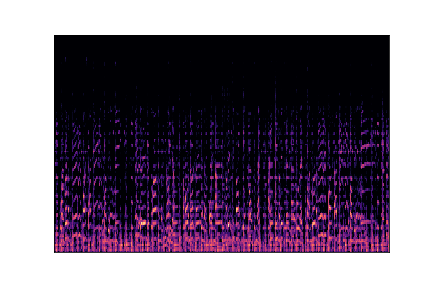

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/blues00000.png')
img
img_height = 217
img_width = 334

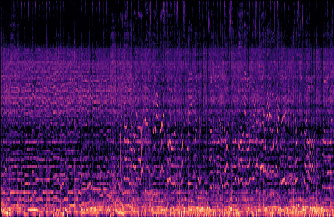

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/metal/metal00000.png')
img

# Обробка даних

In [ ]:
def create_dataset(dataset_path):
  train=[]
  #dataset_path='/content/blues/'
  for img in os.listdir(dataset_path): 
    #img_array = cv2.imread(os.path.join(dataset_path,img))
    #new_array = tf.image.resize(img_array, (56, 56))
    img_array = cv2.imread(os.path.join(dataset_path,img),cv2.IMREAD_GRAYSCALE)
    img_array_flip = cv2.flip(img_array, 1)
    #new_array = cv2.resize(img_array, (128,128))
    img_array = np.expand_dims(img_array, axis=-1)  # Equivalent to x[:,:,np.newaxis]
    img_array_flip=np.expand_dims(img_array_flip, axis=-1)

    new_array = np.pad(img_array, pad_width=[(7, 0),(0, 0),(0, 0)], mode='constant')
    new_array = imutils.resize(new_array, width=192)

    new_array_flip = np.pad(img_array_flip, pad_width=[(7, 0),(0, 0),(0, 0)], mode='constant')
    new_array_flip = imutils.resize(new_array_flip, width=192)
    #new_array = np.true_divide(new_array, 255, dtype=np.float32)
    
    #new_array = np.expand_dims(new_array, axis=-1)

    new_array = (new_array - 127.5) / 127.5
    new_array_flip = (new_array_flip - 127.5) / 127.5
    #new_array_flip = cv2.flip(new_array, 1)
   
    train.append(new_array)
    #train.append(new_array_flip)
    #train.append(new_array_flip)

  return train


In [ ]:
dataset_path='/content/blues/'
spect_blues=create_dataset(dataset_path)
np.save(os.path.join('/content','features_blues'),np.array(spect_blues))
saved_blues = np.load(os.path.join('/content','features_blues.npy'))

dataset_path='/content/rock/'
spect_rock=create_dataset(dataset_path)
np.save(os.path.join('/content','features_rock'),np.array(spect_rock))
saved_rock = np.load(os.path.join('/content','features_rock.npy'))

dataset_path='/content/country/'
spect_country=create_dataset(dataset_path)
np.save(os.path.join('/content','features_country'),np.array(spect_country))
saved_country = np.load(os.path.join('/content','features_country.npy'))

dataset_path='/content/disco/'
spect_disco=create_dataset(dataset_path)
np.save(os.path.join('/content','features_disco'),np.array(spect_disco))
saved_disco = np.load(os.path.join('/content','features_disco.npy'))

dataset_path='/content/hiphop/'
spect_hiphop=create_dataset(dataset_path)
np.save(os.path.join('/content','features_hiphop'),np.array(spect_hiphop))
saved_hiphop = np.load(os.path.join('/content','features_hiphop.npy'))

dataset_path='/content/jazz/'
spect_jazz=create_dataset(dataset_path)
np.save(os.path.join('/content','features_jazz'),np.array(spect_jazz))
saved_jazz = np.load(os.path.join('/content','features_jazz.npy'))

dataset_path='/content/metal/'
spect_metal=create_dataset(dataset_path)
np.save(os.path.join('/content','features_metal'),np.array(spect_metal))
saved_metal = np.load(os.path.join('/content','features_metal.npy'))

dataset_path='/content/pop/'
spect_pop=create_dataset(dataset_path)
np.save(os.path.join('/content','features_pop'),np.array(spect_pop))
saved_pop = np.load(os.path.join('/content','features_pop.npy'))

dataset_path='/content/reggae/'
spect_reggae=create_dataset(dataset_path)
np.save(os.path.join('/content','features_reggae'),np.array(spect_reggae))
saved_reggae = np.load(os.path.join('/content','features_reggae.npy'))

dataset_path='/content/rock/'
spect_rock=create_dataset(dataset_path)
np.save(os.path.join('/content','features_rock'),np.array(spect_rock))
saved_rock = np.load(os.path.join('/content','features_rock.npy'))


dataset_path='/content/classical/'
spect_classical=create_dataset(dataset_path)
np.save(os.path.join('/content','features_classical'),np.array(spect_classical))
saved_classical = np.load(os.path.join('/content','features_classical.npy'))

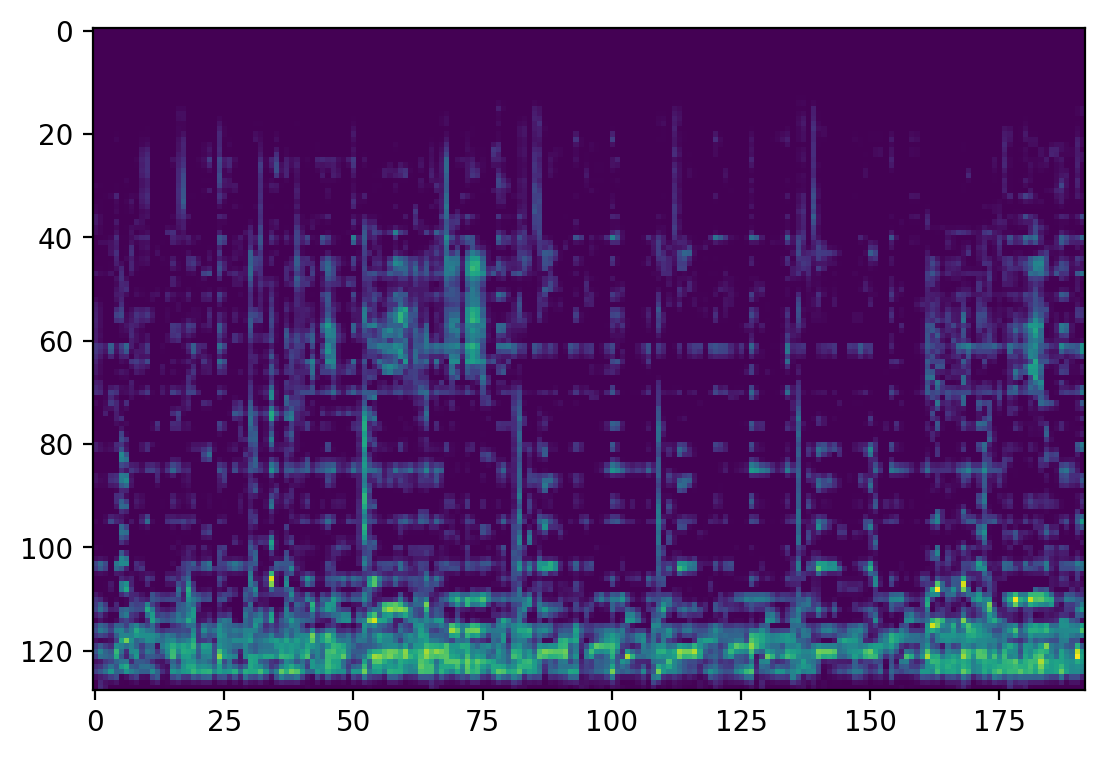

In [ ]:
plt.imshow(saved_rock[7])

## Підготовка даних для навчання

In [ ]:
import random

def gaus_noise(dataset):
  mean = 0
  stddev = 0.05
  img=[]
  for image in dataset:
    noise = np.zeros((128,192),np.float64)
    cv2.randn(noise, mean, stddev)
    image = cv2.add(image, noise)
    img.append(image)
  img = np.asarray(img)
  return img

def generate_real_samples(dataset, n_samples):
    #ix = randint(0, 100, n_samples)
    
    ix = randint(0, dataset.shape[0], n_samples)
 # retrieve selected images
    X = dataset[ix]
    #X = X.astype('float32')
 # scale from [0,255] to [-1,1]
    #X = (X - 127.5) / 127.5
    #random.shuffle(dataset)
    #X = dataset[:n_samples]
    ##add noise

    #X=gaus_noise(X)

    y = []
    for i in range(0,n_samples):
      n = round(random.uniform(0.9,1),1)
      y.append(n)
    y=np.array(y)
    y.resize(n_samples,1)
    #y = ones((n_samples, 1))
    return X, y
 
def generate_latent_points(latent_dim, n_samples):
    x_input =  randn(latent_dim * n_samples)#
    #x_input =  np.random.uniform(-1, 1, size=(latent_dim, n_samples))#до меж -1,1 uniform distribution
    x_input = x_input.reshape(n_samples, latent_dim)
    #x_input=tf.random.normal(shape=(n_samples,latent_dim))
    return x_input

def generate_fake_samples(g_model, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    #X = X.astype('float32')
 # scale from [0,255] to [-1,1]
    #X=(X-127.5)/127.5
    #X = (X + 1)/2.0

    #X=gaus_noise(X)
    y = []
    for i in range(0,n_samples):
      n = round(random.uniform(0,0.1 ),1)
      y.append(n)
    y=np.array(y)
    y.resize(n_samples,1)
    #y = zeros((n_samples, 1))
    return X, y



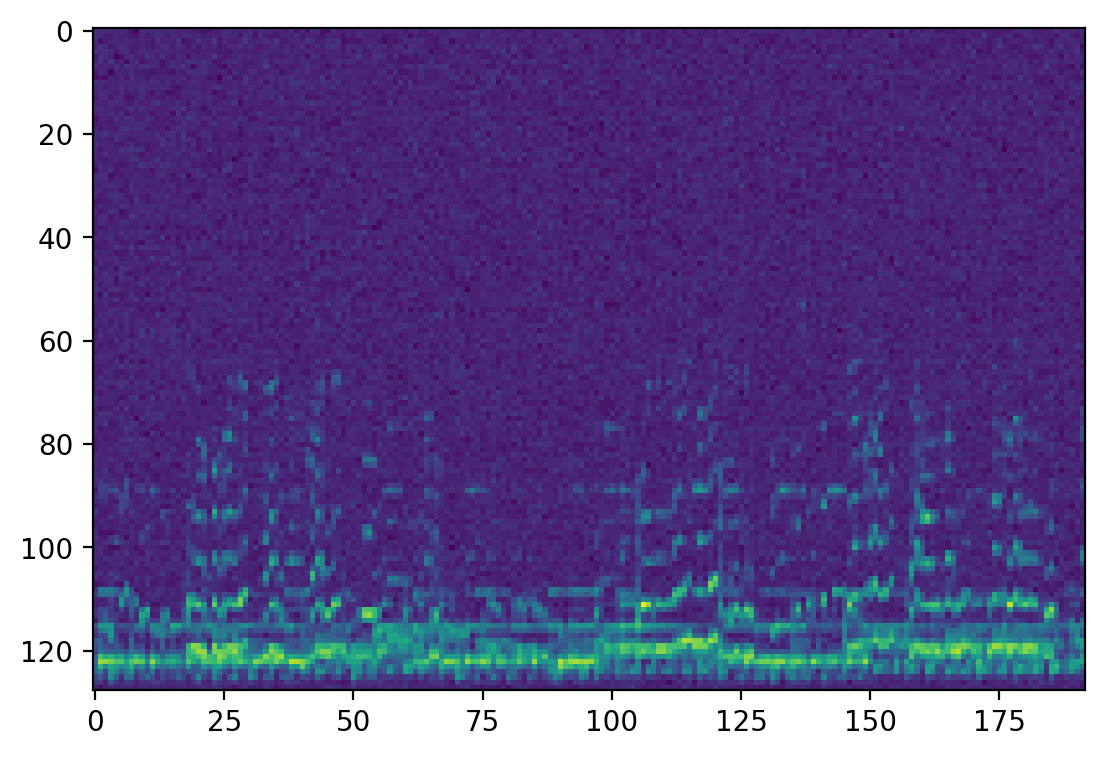

In [ ]:
x,_=generate_real_samples(saved_blues, 3)
plt.imshow(x[0])

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import imageio

def save_imgs(epoch,latent_dim,g_model,genre_name):
    #noise = np.random.normal(0, 1, (1, latent_dim))
    gen_imgs, _ = generate_fake_samples(g_model, latent_dim, 1)
    #gen_imgs = g_model.predict(noise)
    #gen_imgs = (gen_imgs - gen_imgs.min()) / (gen_imgs.max() - gen_imgs.min())
    #array = np.array(x.reshape(56,56),dtype = np.uint8)
    gen_imgs.resize(128,192)
    #gray_image = cv2.cvtColor(gen_imgs, cv2.COLOR_BGR2GRAY)
    #new_image = Image.fromarray(gen_imgs,mode="L")
    #new_image = Image.fromarray(gen_imgs,'L')
    path=os.path.join("images",'%s_%d.png' % (genre_name,epoch))
    imageio.imwrite(path, gen_imgs)


## Моделі

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Layer
from tensorflow.keras.backend import backend as k
import tensorflow.keras.backend as K

class PixelNormalization(Layer):

  def __init__(self, **kwargs):
    super(PixelNormalization, self).__init__(**kwargs)
 
  def call(self, inputs):
    values = inputs**2.0
    mean_values = K.mean(values, axis=-1, keepdims=True)
    mean_values += 1.0e-8
    l2 = K.sqrt(mean_values)
    normalized = inputs / l2
    return normalized
 

  def compute_output_shape(self, input_shape):
    return input_shape

In [ ]:
from keras.initializers import RandomNormal
def generator_blues(latent_dim):
  latent_dim=latent_dim
  activation=ReLU(0.2)
  n_nodes = 128 * 16 * 16
  init = RandomNormal(stddev=0.02)
  model = Sequential()
  model.add(Dense(n_nodes, input_dim=latent_dim,kernel_initializer=init))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((16, 16, 128)))
  model.add(Conv2D(512, (2,2), padding='same',kernel_initializer=init))
  model.add(PixelNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization())
  model.add(Conv2D(512, (2,2), padding='same',kernel_initializer=init))
  model.add(PixelNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2DTranspose(512,kernel_size= (2,2), strides=(2, 2),kernel_initializer=init))
  model.add(Conv2D(256, (2,2), padding='same',kernel_initializer=init))
  model.add(PixelNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization())
  model.add(Conv2D(256, (2,2), padding='same',kernel_initializer=init))
  model.add(PixelNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2DTranspose(256,kernel_size= (2,2), strides=(2, 2),kernel_initializer=init))
  model.add(Conv2D(128, (2,2), padding='same',kernel_initializer=init))
  model.add(PixelNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (2,2), padding='same',kernel_initializer=init))
  model.add(PixelNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2DTranspose(128,kernel_size= (2,2), strides=(2, 3),kernel_initializer=init))
  model.add(Conv2D(64, (2,2), padding='same',kernel_initializer=init))
  model.add(PixelNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (2,2), padding='same',kernel_initializer=init))
  model.add(PixelNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(1,(2,2) , padding='same',activation='tanh',kernel_initializer=init))

  #model.summary()
  return model

m=generator_blues(16).summary()


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32768)             557056    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32768)             0         
                                                                 
 reshape (Reshape)           (None, 16, 16, 128)       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 512)       262656    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 512)       0         
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 512)      2048      
 ormalization)                                                   
                                                        

In [ ]:
from keras.initializers import RandomNormal
def generator_blues(latent_dim):
  latent_dim=latent_dim
  activation=ReLU(0.2)
  n_nodes = 128 * 16 * 16
  init = RandomNormal(stddev=0.02)
  model = Sequential()
  model.add(Dense(n_nodes, input_dim=latent_dim,kernel_initializer=init))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((16, 16, 128)))

  model.add(Conv2DTranspose(512,kernel_size= (2,2), strides=(2, 2),kernel_initializer=init))
  model.add(Conv2D(512, (2,2) , padding='same',kernel_initializer=init))

  model.add(LeakyReLU(alpha=0.2))
  #model.add(Dropout(0.2))

  #model.add(Conv2D(512, (2,2), activation=activation,kernel_regularizer=tf.keras.regularizers.l2(0.03)))#2*2*256
  model.add(Conv2DTranspose(256,kernel_size= (2,2), strides=(2, 2)))#8*8*256
  model.add(Conv2D(256, (2,2) , padding='same',kernel_initializer=init))#16*16*128
  model.add(LeakyReLU(alpha=0.2))
  
  model.add(Conv2DTranspose(128,kernel_size= (2,2), strides=(2, 2),kernel_initializer=init))#8*8*256
  #model.add(Conv2D(128, (2,2) , padding='same',kernel_initializer=init))#16*16*128
  #model.add(LeakyReLU(alpha=0.2))
 
  
  #model.add(BatchNormalization())
  #model.add(Dropout(0.2))
  model.add(Conv2D(3,(2,2) , padding='same',activation='tanh',kernel_initializer=init))#32*32*1

  #model.summary()
  return model

m=generator_blues(16).summary()


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 32768)             557056    
                                                                 
 leaky_re_lu_170 (LeakyReLU)  (None, 32768)            0         
                                                                 
 reshape_14 (Reshape)        (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_42 (Conv2D  (None, 32, 32, 512)      262656    
 Transpose)                                                      
                                                                 
 conv2d_126 (Conv2D)         (None, 32, 32, 512)       1049088   
                                                                 
 leaky_re_lu_171 (LeakyReLU)  (None, 32, 32, 512)      0         
                                                     

In [ ]:
!pip install tensorflow-addons

In [ ]:
img_h=128
img_w=192
channels=1
img_shape=(img_h,img_w,channels)


In [ ]:
def discriminator_blues():

  init = RandomNormal(stddev=0.02)
  activation=LeakyReLU(alpha=0.2)
  model = Sequential()#32*32*3


  model.add(Conv2D(32, (1,1),input_shape=img_shape))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(64, (2,2),kernel_initializer=init))
  model.add(BatchNormalization())
  #model.add(InstanceNormalization(axis=-1))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(64, (2,2),kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  #model.add(AveragePooling2D(pool_size= (2,2)))#16*16*256
  model.add(Conv2D(64, (2,2),strides=(2,2),kernel_initializer=init))

  model.add(Conv2D(128, (2,2),kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(128, (2,2),kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(128, (2,2),strides=(2,2),kernel_initializer=init))
  
  model.add(Conv2D(256, (2,2),kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(256, (2,2),kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(256, (2,2),strides=(2,2),kernel_initializer=init))
  
  




  model.add(Flatten())
  #model.add(Dense(256))
  #model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5),metrics='accuracy')
  #model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.0009,
   # momentum=0.8,
    #nesterov=False),metrics='accuracy')

  return model

m=discriminator_blues().summary()

In [ ]:
import tensorflow_addons as tfa
from tensorflow_addons.layers import InstanceNormalization

def discriminator_blues():

  init = RandomNormal(stddev=0.02)
  activation=LeakyReLU(alpha=0.2)
  model = Sequential()

  model.add(Conv2D(64, (4,4),strides=(2,2), padding='same',input_shape=img_shape))
  model.add(ReLU(alpha=0.2))

  model.add(Conv2D(128, (4,4),strides=(2,2), padding='same',kernel_initializer=init))
  model.add(InstanceNormalization(axis=-1))
  model.add(LeakyReLU(alpha=0.2))
  #model.add(AveragePooling2D(pool_size= (2,2)))#8*8*256

  #model.add(BatchNormalization())
  #model.add(Dropout(0.4))
  
  model.add(Conv2D(256, (4,4),strides=(2,2), padding='same',kernel_initializer=init))
  model.add(InstanceNormalization(axis=-1))
  model.add(LeakyReLU(alpha=0.2))
  #model.add(AveragePooling2D(pool_size= (2,2)))#4*4*128

  #model.add(BatchNormalization())

  model.add(Conv2D(512, (4,4), padding='same',kernel_initializer=init))
  model.add(InstanceNormalization(axis=-1))
  model.add(LeakyReLU(alpha=0.2))
  #model.add(AveragePooling2D(pool_size= (2,2)))#2*2*
  model.add(Conv2D(512, (4,4), padding='same',kernel_initializer=init))
  model.add(InstanceNormalization(axis=-1))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Flatten())
  #model.add(Dense(64))
  #model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5,amsgrad=True),metrics='accuracy')
  #model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.0009,
   # momentum=0.8,
    #nesterov=False),metrics='accuracy')

  return model

m=discriminator_blues().summary()

In [ ]:

from keras.layers import Layer
import tensorflow as tf
import keras
from tensorflow.keras.backend import backend as k
import tensorflow.keras.backend as K
class MinibatchStdev(Layer):
    def __init__(self, **kwargs):
        super(MinibatchStdev, self).__init__(**kwargs)

    
    def call(self, inputs):
        mean = K.mean(inputs, axis=0, keepdims=True)
        mean_sq_diff = K.mean(K.square(inputs - mean), axis=0, keepdims=True) + 1e-8
        mean_pix = K.mean(K.sqrt(mean_sq_diff), keepdims=True)
        shape = K.shape(inputs)
        output = K.tile(mean_pix, [shape[0], shape[1], shape[2], 1])
        return K.concatenate([inputs, output], axis=-1)


    def compute_output_shape(self, input_shape):
        input_shape = list(input_shape)
        input_shape[-1] += 1
        return tuple(input_shape)

In [ ]:
 
def discriminator_blues():
  init = RandomNormal(stddev=0.02)
  activation=LeakyReLU(alpha=0.2)
  #model = Sequential()#32*32*3

  discriminator_input = Input(shape=img_shape, name='discriminator_input')
  x=Conv2D(32, (1,1),input_shape=img_shape)(discriminator_input)
  x =BatchNormalization()(x)
  x =LeakyReLU(alpha=0.2)(x)

  x =Conv2D(64, (2,2),kernel_initializer=init)(x)
  x =BatchNormalization()(x)
  #model.add(InstanceNormalization(axis=-1))
  x =LeakyReLU(alpha=0.2)(x)
  x =Conv2D(64, (2,2),kernel_initializer=init)(x)
  x =BatchNormalization()(x)
  x =LeakyReLU(alpha=0.2)(x)
  #model.add(AveragePooling2D(pool_size= (2,2)))#16*16*256

  x =Conv2D(64, (2,2),strides=(2,2),kernel_initializer=init)(x)

  #x =Dropout(0.2)(x)

  x =Conv2D(128, (2,2),kernel_initializer=init)(x)
  x =BatchNormalization()(x)
  x =LeakyReLU(alpha=0.2)(x)
  x =Conv2D(128, (2,2),kernel_initializer=init)(x)
  x =BatchNormalization()(x)
  x =LeakyReLU(alpha=0.2)(x)

  x =Conv2D(128, (2,2),strides=(2,2),kernel_initializer=init)(x)

  

  x =Conv2D(256, (2,2),kernel_initializer=init)(x)
  x =BatchNormalization()(x)
  x =LeakyReLU(alpha=0.2)(x)
  

  x =Conv2D(256, (2,2),strides=(2,2),kernel_initializer=init)(x)

  x = MinibatchStdev()(x)

  x =Conv2D(256, (2,2),kernel_initializer=init)(x)
  x =BatchNormalization()(x)
  x =LeakyReLU(alpha=0.2)(x)
  
  x =Flatten()(x)
  discriminator_output =Dense(1, activation='sigmoid')(x)
  
  return Model(discriminator_input, discriminator_output, name='discriminator_blues')

m=discriminator_blues().summary()
type(m)

Model: "discriminator_blues"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 discriminator_input (InputL  [(None, 128, 192, 1)]    0         
 ayer)                                                           
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 192, 32)      64        
                                                                 
 batch_normalization_4 (Batc  (None, 128, 192, 32)     128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 128, 192, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 127, 191, 64)      8256      
                                                                 
 batch_normalization_5 (Batc  (None, 127, 191, 

NoneType

In [ ]:

def discriminator_blues():
  init = RandomNormal(stddev=0.02)
  activation=LeakyReLU(alpha=0.2)
  model = Sequential()#32*32*3


  model.add(Conv2D(32, (1,1),input_shape=img_shape))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(64, (2,2),kernel_initializer=init))
  model.add(BatchNormalization())
  #model.add(InstanceNormalization(axis=-1))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(64, (2,2),kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  #model.add(AveragePooling2D(pool_size= (2,2)))#16*16*256
  model.add(Conv2D(64, (2,2),strides=(2,2),kernel_initializer=init))

  model.add(Dropout(0.2))

  model.add(Conv2D(128, (2,2),kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(128, (2,2),kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(128, (2,2),strides=(2,2),kernel_initializer=init))

  model.add(Dropout(0.2))
  
  model.add(Conv2D(256, (2,2),kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(256, (2,2),kernel_initializer=init))#
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(256, (2,2),strides=(2,2),kernel_initializer=init))

  model.add(Dropout(0.2))

  model.add(Conv2D(512, (2,2),kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(512, (2,2),kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  

  model.add(Flatten())
  #model.add(Dense(256))
  #model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001, beta_1=0.5),metrics='accuracy')
  #model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.0009,
   # momentum=0.8,
    #nesterov=False),metrics='accuracy')

  return model

m=discriminator_blues().summary()
type(m)

In [ ]:

def plot_history(i,d1_hist, d2_hist, g_hist, a1_hist, a2_hist,genre_name):

 
  pyplot.subplot(2, 1, 1)
  pyplot.plot(d1_hist, label='d-real')
  pyplot.plot(d2_hist, label='d-fake')
  pyplot.plot(g_hist, label='gen')
  pyplot.legend()
  pyplot.subplot(2, 1, 2)
  pyplot.plot(a1_hist, label='acc-real')
  pyplot.plot(a2_hist, label='acc-fake')
  pyplot.legend()
  path=os.path.join("plot",'plot_line_plot_loss_%d_%s.png' % (i,genre_name))
  pyplot.savefig(path)
  pyplot.close()

In [ ]:
def define_gan(g_model, d_model):
    d_model.trainable = False
    model = Sequential()
    
    model.add(g_model)
    model.add(d_model)
    
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model
d=discriminator_blues()
g=generator_blues(16)

m=define_gan(g, d)

In [ ]:
from numpy import sqrt 

def summarize_performance_1(epoch,g_model, d_model, dataset, latent_dim,genre_name, n_samples=25):

  X,_ =generate_fake_samples(g_model, latent_dim, n_samples)
  #X = (X - 127.5) / 127.5
  square = int(sqrt(n_samples))
  for i in range(n_samples):
    pyplot.subplot(square, square, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(X[i])
  filename1 = 'plot_%s_%s.png' % ((epoch + 1), genre_name)
  pyplot.savefig(filename1)
  pyplot.close()
  filename = 'generator_model_%s_%03d.h5' %(genre_name, (epoch + 1)) 
  g_model.save(filename)

   

In [ ]:
def train(g_model, d_model, gan_model, dataset, latent_dim,genre_name, n_epochs=100, n_batch=20,save_interval=10):
    bat_per_epo =int(len(dataset) / n_batch)
    half_batch = int(n_batch / 2)
    d1_hist, d2_hist, g_hist, a1_hist, a2_hist = list(), list(), list(), list(), list()
    for i in range(n_epochs):
        for j in range(bat_per_epo):
            X_real, y_real = generate_real_samples(dataset, half_batch)
            d1_loss,d1_acc = d_model.train_on_batch(X_real, y_real)
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            #X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))#модель починає не сходитися
            d2_loss,d2_acc = d_model.train_on_batch(X_fake, y_fake)

            X_gan = generate_latent_points(latent_dim, n_batch) 
            y_gan = ones((n_batch, 1))#*random.uniform(0.9, 1.0)
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            print('>%d, %d/%d, d1_loss=%.3f,d2_loss=%.3f, gan_loss=%.3f, d1_acc=%.3f, d2_acc=%.3f' % (i+1, j+1, bat_per_epo, d1_loss,d2_loss,g_loss,d1_acc,d2_acc))
            d1_hist.append(d1_loss)
            d2_hist.append(d2_loss)
            g_hist.append(g_loss)
            a1_hist.append(d1_acc)
            a2_hist.append(d2_acc)
        if (i+1) % 2 == 0:
          #gen_model = generator_blues(latent_dim)
          save_imgs(i,latent_dim,g_model,genre_name)
        if (i+1) % 5 == 0:
          plot_history(i,d1_hist, d2_hist, g_hist, a1_hist, a2_hist,genre_name)
          summarize_performance_1(i, g_model, d_model, dataset, latent_dim,genre_name)
        

In [ ]:
!mkdir images
!mkdir plot

In [ ]:

latent_dim = 100
d_model = discriminator_blues()
d_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5),metrics='accuracy')
  
g_model = generator_blues(latent_dim)
genre_names=[("blues"),("classical"),("country"),("disco"),("hiphop"),("jazz"),("metal"),("pop"),("reggae"),("rock")]
gan_model = define_gan(g_model, d_model)
traini=saved_blues
traini.shape


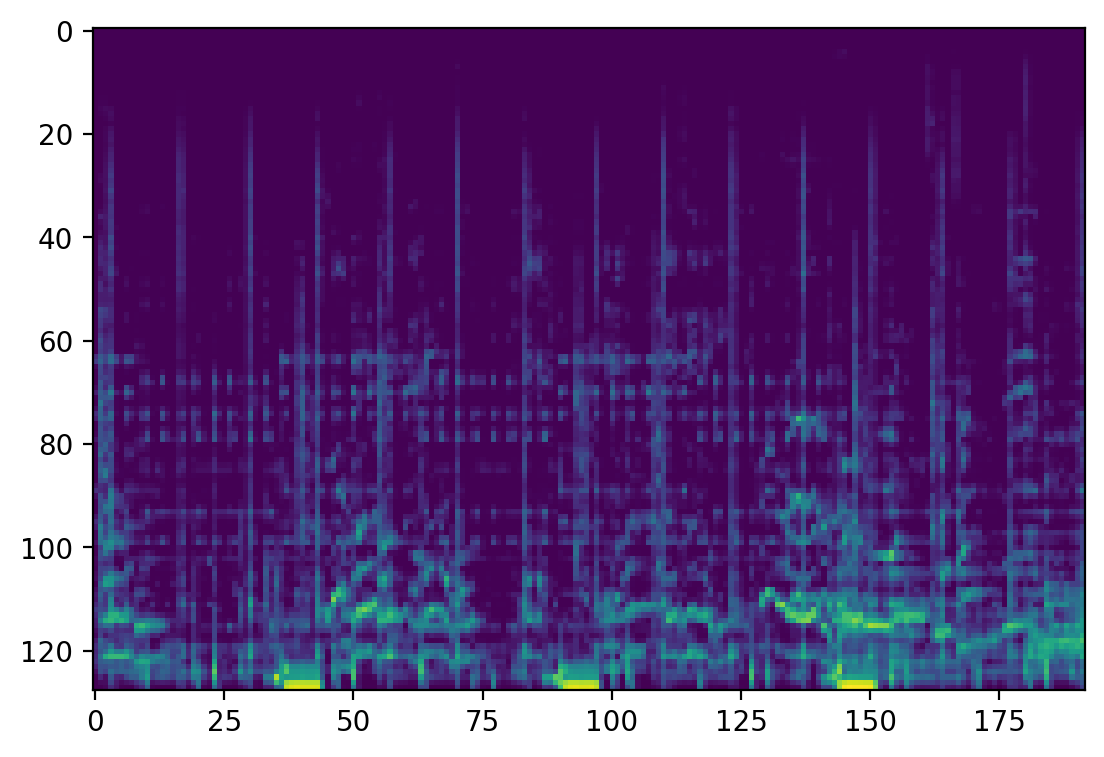

In [ ]:
plt.imshow(traini[90])

In [ ]:
train(g_model, d_model, gan_model,traini, latent_dim,genre_names[0])

1/1 [==============================] - 2s 2s/step
>1, 1/5, d1_loss=0.691,d2_loss=0.976, gan_loss=0.692, d1_acc=0.300, d2_acc=0.000
1/1 [==============================] - 2s 2s/step
>1, 2/5, d1_loss=0.272,d2_loss=0.740, gan_loss=0.692, d1_acc=0.600, d2_acc=0.100
1/1 [==============================] - 3s 3s/step
>1, 3/5, d1_loss=0.296,d2_loss=0.757, gan_loss=0.696, d1_acc=0.400, d2_acc=0.100
1/1 [==============================] - 3s 3s/step
>1, 4/5, d1_loss=1.154,d2_loss=0.404, gan_loss=0.689, d1_acc=0.300, d2_acc=0.800
1/1 [==============================] - 3s 3s/step
>1, 5/5, d1_loss=0.427,d2_loss=0.156, gan_loss=0.688, d1_acc=0.500, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>2, 1/5, d1_loss=0.320,d2_loss=0.239, gan_loss=0.688, d1_acc=0.600, d2_acc=0.500
1/1 [==============================] - 3s 3s/step
>2, 2/5, d1_loss=0.269,d2_loss=0.209, gan_loss=0.689, d1_acc=0.700, d2_acc=0.600
1/1 [==============================] - 4s 4s/step
>2, 3/5, d1_loss=0.452,d2_loss=0.

1/1 [==============================] - 2s 2s/step
>3, 1/5, d1_loss=0.639,d2_loss=0.395, gan_loss=0.674, d1_acc=0.400, d2_acc=0.300
1/1 [==============================] - 2s 2s/step
>3, 2/5, d1_loss=0.380,d2_loss=0.331, gan_loss=0.679, d1_acc=0.400, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>3, 3/5, d1_loss=0.451,d2_loss=0.144, gan_loss=0.687, d1_acc=0.400, d2_acc=0.800
1/1 [==============================] - 2s 2s/step
>3, 4/5, d1_loss=0.314,d2_loss=0.938, gan_loss=0.701, d1_acc=0.400, d2_acc=0.000
1/1 [==============================] - 2s 2s/step
>3, 5/5, d1_loss=0.180,d2_loss=0.379, gan_loss=0.694, d1_acc=0.700, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>4, 1/5, d1_loss=0.356,d2_loss=17.530, gan_loss=0.710, d1_acc=0.500, d2_acc=0.000
1/1 [==============================] - 2s 2s/step
>4, 2/5, d1_loss=0.225,d2_loss=0.318, gan_loss=0.714, d1_acc=0.800, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>4, 3/5, d1_loss=0.414,d2_loss=0

1/1 [==============================] - 3s 3s/step
>5, 1/5, d1_loss=0.432,d2_loss=5.304, gan_loss=0.783, d1_acc=0.400, d2_acc=0.000
1/1 [==============================] - 3s 3s/step
>5, 2/5, d1_loss=0.436,d2_loss=0.627, gan_loss=0.773, d1_acc=0.700, d2_acc=0.700
1/1 [==============================] - 3s 3s/step
>5, 3/5, d1_loss=0.679,d2_loss=0.391, gan_loss=0.751, d1_acc=0.500, d2_acc=0.700
1/1 [==============================] - 3s 3s/step
>5, 4/5, d1_loss=0.745,d2_loss=2.954, gan_loss=0.805, d1_acc=0.200, d2_acc=0.000
1/1 [==============================] - 3s 3s/step
>5, 5/5, d1_loss=0.287,d2_loss=1.158, gan_loss=0.859, d1_acc=0.500, d2_acc=0.500
1/1 [==============================] - 11s 11s/step


1/1 [==============================] - 2s 2s/step
>6, 1/5, d1_loss=0.578,d2_loss=1.158, gan_loss=0.846, d1_acc=0.500, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>6, 2/5, d1_loss=0.892,d2_loss=0.615, gan_loss=0.787, d1_acc=0.200, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>6, 3/5, d1_loss=0.381,d2_loss=0.380, gan_loss=0.774, d1_acc=0.400, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>6, 4/5, d1_loss=0.318,d2_loss=0.175, gan_loss=0.755, d1_acc=0.600, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>6, 5/5, d1_loss=0.419,d2_loss=0.265, gan_loss=0.750, d1_acc=0.400, d2_acc=0.300
1/1 [==============================] - 0s 361ms/step


1/1 [==============================] - 2s 2s/step
>7, 1/5, d1_loss=0.175,d2_loss=0.273, gan_loss=0.761, d1_acc=0.800, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>7, 2/5, d1_loss=0.465,d2_loss=0.245, gan_loss=0.773, d1_acc=0.500, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>7, 3/5, d1_loss=0.197,d2_loss=0.499, gan_loss=0.762, d1_acc=0.800, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>7, 4/5, d1_loss=0.396,d2_loss=0.282, gan_loss=0.739, d1_acc=0.600, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>7, 5/5, d1_loss=0.349,d2_loss=0.284, gan_loss=0.729, d1_acc=0.400, d2_acc=0.200
1/1 [==============================] - 3s 3s/step
>8, 1/5, d1_loss=0.396,d2_loss=0.335, gan_loss=0.784, d1_acc=0.200, d2_acc=0.700
1/1 [==============================] - 3s 3s/step
>8, 2/5, d1_loss=0.226,d2_loss=0.564, gan_loss=0.795, d1_acc=0.500, d2_acc=0.500
1/1 [==============================] - 3s 3s/step
>8, 3/5, d1_loss=0.173,d2_loss=0.

1/1 [==============================] - 3s 3s/step
>9, 1/5, d1_loss=0.253,d2_loss=0.302, gan_loss=0.724, d1_acc=0.500, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>9, 2/5, d1_loss=0.197,d2_loss=0.227, gan_loss=0.726, d1_acc=0.600, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>9, 3/5, d1_loss=0.580,d2_loss=0.170, gan_loss=0.796, d1_acc=0.200, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>9, 4/5, d1_loss=0.431,d2_loss=0.168, gan_loss=0.809, d1_acc=0.200, d2_acc=0.600
1/1 [==============================] - 3s 3s/step
>9, 5/5, d1_loss=0.385,d2_loss=0.204, gan_loss=0.810, d1_acc=0.400, d2_acc=0.500
1/1 [==============================] - 3s 3s/step
>10, 1/5, d1_loss=0.357,d2_loss=0.232, gan_loss=0.808, d1_acc=0.500, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>10, 2/5, d1_loss=0.079,d2_loss=0.169, gan_loss=0.784, d1_acc=0.900, d2_acc=0.600
1/1 [==============================] - 3s 3s/step
>10, 3/5, d1_loss=0.325,d2_loss

1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 2s 2s/step
>11, 1/5, d1_loss=0.326,d2_loss=0.274, gan_loss=0.825, d1_acc=0.300, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>11, 2/5, d1_loss=0.337,d2_loss=0.217, gan_loss=0.757, d1_acc=0.600, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>11, 3/5, d1_loss=0.346,d2_loss=0.120, gan_loss=0.735, d1_acc=0.300, d2_acc=0.800
1/1 [==============================] - 2s 2s/step
>11, 4/5, d1_loss=0.260,d2_loss=0.193, gan_loss=0.730, d1_acc=0.600, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>11, 5/5, d1_loss=0.235,d2_loss=0.279, gan_loss=0.755, d1_acc=0.600, d2_acc=0.300
1/1 [==============================] - 3s 3s/step
>12, 1/5, d1_loss=0.352,d2_loss=0.315, gan_loss=0.723, d1_acc=0.500, d2_acc=0.500
1/1 [==============================] - 3s 3s/step
>12, 2/5, d1_loss=0.215,d2_loss=0.242, gan_loss=0.690, d1_acc=0.400, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>12, 3/5, d1_loss=0.308,d2

1/1 [==============================] - 2s 2s/step
>13, 1/5, d1_loss=0.318,d2_loss=0.186, gan_loss=0.583, d1_acc=0.400, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>13, 2/5, d1_loss=0.343,d2_loss=0.157, gan_loss=0.626, d1_acc=0.500, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>13, 3/5, d1_loss=0.205,d2_loss=0.156, gan_loss=0.671, d1_acc=0.600, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>13, 4/5, d1_loss=0.248,d2_loss=0.150, gan_loss=0.667, d1_acc=0.600, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>13, 5/5, d1_loss=0.198,d2_loss=0.279, gan_loss=0.595, d1_acc=0.600, d2_acc=0.300
1/1 [==============================] - 2s 2s/step
>14, 1/5, d1_loss=0.195,d2_loss=0.422, gan_loss=0.710, d1_acc=0.500, d2_acc=0.300
1/1 [==============================] - 2s 2s/step
>14, 2/5, d1_loss=0.172,d2_loss=0.622, gan_loss=0.714, d1_acc=0.700, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>14, 3/5, d1_loss=0.165,d2

1/1 [==============================] - 2s 2s/step
>15, 1/5, d1_loss=0.218,d2_loss=0.215, gan_loss=0.621, d1_acc=0.500, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>15, 2/5, d1_loss=0.265,d2_loss=0.243, gan_loss=0.629, d1_acc=0.300, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>15, 3/5, d1_loss=0.351,d2_loss=0.200, gan_loss=0.591, d1_acc=0.200, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>15, 4/5, d1_loss=0.234,d2_loss=0.148, gan_loss=0.583, d1_acc=0.400, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>15, 5/5, d1_loss=0.270,d2_loss=0.228, gan_loss=0.515, d1_acc=0.500, d2_acc=0.500
1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 3s 3s/step
>16, 1/5, d1_loss=0.561,d2_loss=0.329, gan_loss=0.511, d1_acc=0.300, d2_acc=0.000
1/1 [==============================] - 2s 2s/step
>16, 2/5, d1_loss=0.285,d2_loss=0.509, gan_loss=0.685, d1_acc=0.700, d2_acc=0.600
1/1 [==============================] - 3s 3s/step
>16, 3/5, d1_loss=0.211,d2_loss=0.549, gan_loss=0.867, d1_acc=0.600, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>16, 4/5, d1_loss=0.293,d2_loss=1.020, gan_loss=0.905, d1_acc=0.700, d2_acc=0.400
1/1 [==============================] - 5s 5s/step
>16, 5/5, d1_loss=0.685,d2_loss=0.499, gan_loss=0.930, d1_acc=0.200, d2_acc=0.600
1/1 [==============================] - 0s 197ms/step


1/1 [==============================] - 3s 3s/step
>17, 1/5, d1_loss=0.369,d2_loss=0.277, gan_loss=0.846, d1_acc=0.400, d2_acc=0.700
1/1 [==============================] - 3s 3s/step
>17, 2/5, d1_loss=0.455,d2_loss=0.281, gan_loss=0.775, d1_acc=0.400, d2_acc=0.300
1/1 [==============================] - 2s 2s/step
>17, 3/5, d1_loss=0.453,d2_loss=0.782, gan_loss=1.291, d1_acc=0.300, d2_acc=0.300
1/1 [==============================] - 3s 3s/step
>17, 4/5, d1_loss=0.552,d2_loss=1.051, gan_loss=0.919, d1_acc=0.300, d2_acc=0.500
1/1 [==============================] - 3s 3s/step
>17, 5/5, d1_loss=0.284,d2_loss=0.941, gan_loss=0.653, d1_acc=0.600, d2_acc=0.500
1/1 [==============================] - 4s 4s/step
>18, 1/5, d1_loss=0.214,d2_loss=0.758, gan_loss=0.525, d1_acc=0.700, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>18, 2/5, d1_loss=0.241,d2_loss=0.494, gan_loss=0.650, d1_acc=0.500, d2_acc=0.200
1/1 [==============================] - 2s 2s/step
>18, 3/5, d1_loss=0.515,d2

1/1 [==============================] - 2s 2s/step
>19, 1/5, d1_loss=0.090,d2_loss=0.268, gan_loss=0.493, d1_acc=0.800, d2_acc=0.300
1/1 [==============================] - 2s 2s/step
>19, 2/5, d1_loss=0.219,d2_loss=0.336, gan_loss=0.670, d1_acc=0.500, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>19, 3/5, d1_loss=0.388,d2_loss=0.322, gan_loss=0.823, d1_acc=0.200, d2_acc=0.700
1/1 [==============================] - 3s 3s/step
>19, 4/5, d1_loss=0.504,d2_loss=0.604, gan_loss=0.653, d1_acc=0.400, d2_acc=0.300
1/1 [==============================] - 3s 3s/step
>19, 5/5, d1_loss=0.255,d2_loss=0.148, gan_loss=0.588, d1_acc=0.600, d2_acc=0.700
1/1 [==============================] - 3s 3s/step
>20, 1/5, d1_loss=0.437,d2_loss=0.178, gan_loss=0.508, d1_acc=0.600, d2_acc=0.600
1/1 [==============================] - 3s 3s/step
>20, 2/5, d1_loss=0.814,d2_loss=0.177, gan_loss=0.515, d1_acc=0.200, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>20, 3/5, d1_loss=0.507,d2

1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 3s 3s/step
>21, 1/5, d1_loss=0.389,d2_loss=0.223, gan_loss=0.439, d1_acc=0.400, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>21, 2/5, d1_loss=0.382,d2_loss=0.279, gan_loss=0.599, d1_acc=0.400, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>21, 3/5, d1_loss=0.180,d2_loss=0.382, gan_loss=0.618, d1_acc=0.600, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>21, 4/5, d1_loss=0.236,d2_loss=0.093, gan_loss=0.495, d1_acc=0.500, d2_acc=0.800
1/1 [==============================] - 2s 2s/step
>21, 5/5, d1_loss=0.179,d2_loss=0.056, gan_loss=0.454, d1_acc=0.600, d2_acc=0.900
1/1 [==============================] - 2s 2s/step
>22, 1/5, d1_loss=0.164,d2_loss=0.152, gan_loss=0.414, d1_acc=0.700, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>22, 2/5, d1_loss=0.274,d2_loss=0.322, gan_loss=0.388, d1_acc=0.400, d2_acc=0.200
1/1 [==============================] - 2s 2s/step
>22, 3/5, d1_loss=0.243,d2

1/1 [==============================] - 2s 2s/step
>23, 1/5, d1_loss=0.423,d2_loss=0.504, gan_loss=0.801, d1_acc=0.500, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>23, 2/5, d1_loss=0.455,d2_loss=0.294, gan_loss=0.752, d1_acc=0.500, d2_acc=0.500
1/1 [==============================] - 3s 3s/step
>23, 3/5, d1_loss=0.511,d2_loss=0.219, gan_loss=0.815, d1_acc=0.300, d2_acc=0.500
1/1 [==============================] - 3s 3s/step
>23, 4/5, d1_loss=0.313,d2_loss=0.177, gan_loss=0.790, d1_acc=0.400, d2_acc=0.600
1/1 [==============================] - 3s 3s/step
>23, 5/5, d1_loss=0.324,d2_loss=0.173, gan_loss=0.706, d1_acc=0.600, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>24, 1/5, d1_loss=0.252,d2_loss=0.167, gan_loss=0.423, d1_acc=0.700, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>24, 2/5, d1_loss=0.182,d2_loss=0.096, gan_loss=0.406, d1_acc=0.700, d2_acc=0.900
1/1 [==============================] - 2s 2s/step
>24, 3/5, d1_loss=0.271,d2

1/1 [==============================] - 2s 2s/step
>25, 1/5, d1_loss=0.424,d2_loss=1.357, gan_loss=1.049, d1_acc=0.300, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>25, 2/5, d1_loss=0.289,d2_loss=0.515, gan_loss=0.771, d1_acc=0.300, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>25, 3/5, d1_loss=0.356,d2_loss=0.646, gan_loss=2.479, d1_acc=0.100, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>25, 4/5, d1_loss=0.508,d2_loss=1.208, gan_loss=2.444, d1_acc=0.400, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>25, 5/5, d1_loss=0.255,d2_loss=0.573, gan_loss=2.045, d1_acc=0.400, d2_acc=0.300
1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 3s 3s/step
>26, 1/5, d1_loss=0.347,d2_loss=0.358, gan_loss=1.821, d1_acc=0.300, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>26, 2/5, d1_loss=0.610,d2_loss=0.635, gan_loss=2.214, d1_acc=0.800, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>26, 3/5, d1_loss=0.861,d2_loss=0.563, gan_loss=2.018, d1_acc=0.300, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>26, 4/5, d1_loss=0.478,d2_loss=0.256, gan_loss=1.781, d1_acc=0.300, d2_acc=0.600
1/1 [==============================] - 3s 3s/step
>26, 5/5, d1_loss=0.469,d2_loss=0.164, gan_loss=2.018, d1_acc=0.500, d2_acc=0.700
1/1 [==============================] - 0s 191ms/step


1/1 [==============================] - 3s 3s/step
>27, 1/5, d1_loss=0.384,d2_loss=0.322, gan_loss=2.139, d1_acc=0.400, d2_acc=0.500
1/1 [==============================] - 3s 3s/step
>27, 2/5, d1_loss=0.643,d2_loss=0.138, gan_loss=1.277, d1_acc=0.100, d2_acc=0.700
1/1 [==============================] - 3s 3s/step
>27, 3/5, d1_loss=0.491,d2_loss=0.227, gan_loss=1.095, d1_acc=0.300, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>27, 4/5, d1_loss=0.414,d2_loss=0.240, gan_loss=1.094, d1_acc=0.300, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>27, 5/5, d1_loss=0.276,d2_loss=0.170, gan_loss=0.646, d1_acc=0.500, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>28, 1/5, d1_loss=0.450,d2_loss=0.259, gan_loss=0.788, d1_acc=0.300, d2_acc=0.300
1/1 [==============================] - 2s 2s/step
>28, 2/5, d1_loss=0.352,d2_loss=0.138, gan_loss=1.066, d1_acc=0.500, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>28, 3/5, d1_loss=0.303,d2

1/1 [==============================] - 2s 2s/step
>29, 1/5, d1_loss=0.733,d2_loss=0.350, gan_loss=1.852, d1_acc=0.300, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>29, 2/5, d1_loss=0.418,d2_loss=0.329, gan_loss=1.549, d1_acc=0.500, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>29, 3/5, d1_loss=0.144,d2_loss=0.174, gan_loss=1.331, d1_acc=0.700, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>29, 4/5, d1_loss=0.499,d2_loss=0.135, gan_loss=1.798, d1_acc=0.300, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>29, 5/5, d1_loss=0.318,d2_loss=0.178, gan_loss=2.012, d1_acc=0.600, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>30, 1/5, d1_loss=0.284,d2_loss=0.205, gan_loss=1.414, d1_acc=0.500, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>30, 2/5, d1_loss=0.315,d2_loss=0.219, gan_loss=1.284, d1_acc=0.400, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>30, 3/5, d1_loss=0.182,d2

1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 3s 3s/step
>31, 1/5, d1_loss=0.390,d2_loss=0.296, gan_loss=0.811, d1_acc=0.500, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>31, 2/5, d1_loss=0.652,d2_loss=0.258, gan_loss=0.698, d1_acc=0.200, d2_acc=0.400
1/1 [==============================] - 3s 3s/step
>31, 3/5, d1_loss=0.357,d2_loss=0.325, gan_loss=1.461, d1_acc=0.500, d2_acc=0.300
1/1 [==============================] - 3s 3s/step
>31, 4/5, d1_loss=0.259,d2_loss=0.277, gan_loss=1.461, d1_acc=0.800, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>31, 5/5, d1_loss=0.292,d2_loss=0.367, gan_loss=0.820, d1_acc=0.400, d2_acc=0.600
1/1 [==============================] - 3s 3s/step
>32, 1/5, d1_loss=0.236,d2_loss=0.258, gan_loss=0.527, d1_acc=0.500, d2_acc=0.600
1/1 [==============================] - 3s 3s/step
>32, 2/5, d1_loss=0.198,d2_loss=0.209, gan_loss=0.452, d1_acc=0.500, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>32, 3/5, d1_loss=0.356,d2

1/1 [==============================] - 2s 2s/step
>33, 1/5, d1_loss=0.132,d2_loss=0.408, gan_loss=0.264, d1_acc=0.700, d2_acc=0.500
1/1 [==============================] - 3s 3s/step
>33, 2/5, d1_loss=0.234,d2_loss=0.246, gan_loss=0.212, d1_acc=0.400, d2_acc=0.500
1/1 [==============================] - 3s 3s/step
>33, 3/5, d1_loss=0.199,d2_loss=0.242, gan_loss=0.441, d1_acc=0.600, d2_acc=0.600
1/1 [==============================] - 3s 3s/step
>33, 4/5, d1_loss=0.296,d2_loss=0.363, gan_loss=0.569, d1_acc=0.300, d2_acc=0.600
1/1 [==============================] - 3s 3s/step
>33, 5/5, d1_loss=0.626,d2_loss=0.475, gan_loss=0.349, d1_acc=0.200, d2_acc=0.300
1/1 [==============================] - 2s 2s/step
>34, 1/5, d1_loss=0.448,d2_loss=0.293, gan_loss=0.643, d1_acc=0.500, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>34, 2/5, d1_loss=0.539,d2_loss=0.406, gan_loss=0.948, d1_acc=0.400, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>34, 3/5, d1_loss=0.163,d2

1/1 [==============================] - 2s 2s/step
>35, 1/5, d1_loss=0.298,d2_loss=0.096, gan_loss=0.218, d1_acc=0.600, d2_acc=0.800
1/1 [==============================] - 2s 2s/step
>35, 2/5, d1_loss=0.332,d2_loss=0.240, gan_loss=0.131, d1_acc=0.600, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>35, 3/5, d1_loss=0.185,d2_loss=0.173, gan_loss=0.173, d1_acc=0.600, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>35, 4/5, d1_loss=0.214,d2_loss=0.062, gan_loss=0.182, d1_acc=0.600, d2_acc=0.900
1/1 [==============================] - 2s 2s/step
>35, 5/5, d1_loss=0.279,d2_loss=0.447, gan_loss=0.078, d1_acc=0.600, d2_acc=0.300
1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 2s 2s/step
>36, 1/5, d1_loss=0.274,d2_loss=0.184, gan_loss=0.132, d1_acc=0.400, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>36, 2/5, d1_loss=0.299,d2_loss=0.419, gan_loss=0.135, d1_acc=0.400, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>36, 3/5, d1_loss=0.244,d2_loss=0.216, gan_loss=0.054, d1_acc=0.500, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>36, 4/5, d1_loss=0.412,d2_loss=0.275, gan_loss=0.186, d1_acc=0.200, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>36, 5/5, d1_loss=0.100,d2_loss=0.641, gan_loss=0.135, d1_acc=0.900, d2_acc=0.300
1/1 [==============================] - 0s 322ms/step


1/1 [==============================] - 2s 2s/step
>37, 1/5, d1_loss=0.257,d2_loss=0.568, gan_loss=0.055, d1_acc=0.500, d2_acc=0.100
1/1 [==============================] - 2s 2s/step
>37, 2/5, d1_loss=0.159,d2_loss=0.664, gan_loss=0.703, d1_acc=0.600, d2_acc=0.300
1/1 [==============================] - 2s 2s/step
>37, 3/5, d1_loss=0.395,d2_loss=0.419, gan_loss=1.139, d1_acc=0.300, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>37, 4/5, d1_loss=0.337,d2_loss=0.254, gan_loss=0.875, d1_acc=0.100, d2_acc=0.500
1/1 [==============================] - 3s 3s/step
>37, 5/5, d1_loss=0.412,d2_loss=0.150, gan_loss=0.290, d1_acc=0.400, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>38, 1/5, d1_loss=0.402,d2_loss=0.205, gan_loss=0.836, d1_acc=0.500, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>38, 2/5, d1_loss=0.576,d2_loss=0.339, gan_loss=1.045, d1_acc=0.200, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>38, 3/5, d1_loss=0.129,d2

1/1 [==============================] - 2s 2s/step
>39, 1/5, d1_loss=0.177,d2_loss=0.186, gan_loss=0.708, d1_acc=0.600, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>39, 2/5, d1_loss=0.263,d2_loss=0.212, gan_loss=0.300, d1_acc=0.600, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>39, 3/5, d1_loss=0.181,d2_loss=0.386, gan_loss=2.777, d1_acc=0.700, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>39, 4/5, d1_loss=0.512,d2_loss=0.975, gan_loss=2.803, d1_acc=0.500, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>39, 5/5, d1_loss=0.460,d2_loss=0.751, gan_loss=1.793, d1_acc=0.500, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>40, 1/5, d1_loss=0.356,d2_loss=0.383, gan_loss=0.831, d1_acc=0.600, d2_acc=0.300
1/1 [==============================] - 2s 2s/step
>40, 2/5, d1_loss=0.407,d2_loss=2.391, gan_loss=18.660, d1_acc=0.500, d2_acc=0.000
1/1 [==============================] - 2s 2s/step
>40, 3/5, d1_loss=5.052,d

1/1 [==============================] - 6s 6s/step


1/1 [==============================] - 3s 3s/step
>41, 1/5, d1_loss=0.305,d2_loss=0.887, gan_loss=3.844, d1_acc=0.500, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>41, 2/5, d1_loss=0.621,d2_loss=0.592, gan_loss=0.003, d1_acc=0.300, d2_acc=0.400
1/1 [==============================] - 3s 3s/step
>41, 3/5, d1_loss=0.406,d2_loss=4.453, gan_loss=29.492, d1_acc=0.300, d2_acc=0.000
1/1 [==============================] - 3s 3s/step
>41, 4/5, d1_loss=4.918,d2_loss=0.409, gan_loss=15.270, d1_acc=0.000, d2_acc=0.600
1/1 [==============================] - 3s 3s/step
>41, 5/5, d1_loss=0.460,d2_loss=0.809, gan_loss=23.122, d1_acc=0.500, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>42, 1/5, d1_loss=0.225,d2_loss=0.916, gan_loss=15.510, d1_acc=0.600, d2_acc=0.600
1/1 [==============================] - 3s 3s/step
>42, 2/5, d1_loss=0.755,d2_loss=0.795, gan_loss=21.444, d1_acc=0.300, d2_acc=0.300
1/1 [==============================] - 3s 3s/step
>42, 3/5, d1_loss=0.3

1/1 [==============================] - 3s 3s/step
>43, 1/5, d1_loss=0.382,d2_loss=1.986, gan_loss=22.660, d1_acc=0.500, d2_acc=0.000
1/1 [==============================] - 2s 2s/step
>43, 2/5, d1_loss=3.459,d2_loss=1.747, gan_loss=13.084, d1_acc=0.100, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>43, 3/5, d1_loss=0.505,d2_loss=1.393, gan_loss=0.000, d1_acc=0.500, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>43, 4/5, d1_loss=0.186,d2_loss=0.414, gan_loss=0.000, d1_acc=0.800, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>43, 5/5, d1_loss=0.590,d2_loss=8.572, gan_loss=22.294, d1_acc=0.600, d2_acc=0.000
1/1 [==============================] - 2s 2s/step
>44, 1/5, d1_loss=1.004,d2_loss=1.537, gan_loss=21.806, d1_acc=0.100, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>44, 2/5, d1_loss=2.788,d2_loss=6.959, gan_loss=30.326, d1_acc=0.100, d2_acc=0.000
1/1 [==============================] - 2s 2s/step
>44, 3/5, d1_loss=1.6

1/1 [==============================] - 2s 2s/step
>45, 1/5, d1_loss=0.634,d2_loss=0.354, gan_loss=0.568, d1_acc=0.500, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>45, 2/5, d1_loss=0.193,d2_loss=0.161, gan_loss=0.441, d1_acc=0.800, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>45, 3/5, d1_loss=0.360,d2_loss=0.296, gan_loss=0.587, d1_acc=0.500, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>45, 4/5, d1_loss=0.428,d2_loss=0.319, gan_loss=0.701, d1_acc=0.500, d2_acc=0.300
1/1 [==============================] - 2s 2s/step
>45, 5/5, d1_loss=0.446,d2_loss=0.346, gan_loss=0.277, d1_acc=0.200, d2_acc=0.600
1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 3s 3s/step
>46, 1/5, d1_loss=0.457,d2_loss=0.275, gan_loss=0.002, d1_acc=0.500, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>46, 2/5, d1_loss=0.298,d2_loss=1.416, gan_loss=15.029, d1_acc=0.400, d2_acc=0.100
1/1 [==============================] - 2s 2s/step
>46, 3/5, d1_loss=1.516,d2_loss=2.006, gan_loss=10.162, d1_acc=0.200, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>46, 4/5, d1_loss=0.274,d2_loss=1.158, gan_loss=1.303, d1_acc=0.500, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>46, 5/5, d1_loss=0.710,d2_loss=0.532, gan_loss=0.393, d1_acc=0.100, d2_acc=0.700
1/1 [==============================] - 0s 192ms/step


1/1 [==============================] - 2s 2s/step
>47, 1/5, d1_loss=0.318,d2_loss=0.574, gan_loss=0.293, d1_acc=0.500, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>47, 2/5, d1_loss=0.383,d2_loss=0.490, gan_loss=0.973, d1_acc=0.600, d2_acc=0.300
1/1 [==============================] - 2s 2s/step
>47, 3/5, d1_loss=0.194,d2_loss=0.390, gan_loss=0.980, d1_acc=0.700, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>47, 4/5, d1_loss=0.361,d2_loss=0.458, gan_loss=0.389, d1_acc=0.300, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>47, 5/5, d1_loss=0.486,d2_loss=0.567, gan_loss=0.460, d1_acc=0.600, d2_acc=0.600
1/1 [==============================] - 2s 2s/step
>48, 1/5, d1_loss=0.519,d2_loss=0.450, gan_loss=0.077, d1_acc=0.300, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>48, 2/5, d1_loss=0.310,d2_loss=0.752, gan_loss=0.328, d1_acc=0.400, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>48, 3/5, d1_loss=0.354,d2

1/1 [==============================] - 2s 2s/step
>49, 1/5, d1_loss=0.801,d2_loss=0.625, gan_loss=0.000, d1_acc=0.400, d2_acc=0.300
1/1 [==============================] - 2s 2s/step
>49, 2/5, d1_loss=0.514,d2_loss=0.623, gan_loss=0.008, d1_acc=0.300, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>49, 3/5, d1_loss=0.343,d2_loss=0.468, gan_loss=0.041, d1_acc=0.600, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>49, 4/5, d1_loss=0.253,d2_loss=0.229, gan_loss=0.001, d1_acc=0.700, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>49, 5/5, d1_loss=0.337,d2_loss=0.299, gan_loss=0.001, d1_acc=0.600, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>50, 1/5, d1_loss=0.592,d2_loss=0.279, gan_loss=0.021, d1_acc=0.300, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>50, 2/5, d1_loss=0.349,d2_loss=0.355, gan_loss=0.137, d1_acc=0.300, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>50, 3/5, d1_loss=0.678,d2

1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 3s 3s/step
>51, 1/5, d1_loss=0.371,d2_loss=0.111, gan_loss=0.065, d1_acc=0.400, d2_acc=0.800
1/1 [==============================] - 2s 2s/step
>51, 2/5, d1_loss=0.352,d2_loss=0.167, gan_loss=0.238, d1_acc=0.400, d2_acc=0.700
1/1 [==============================] - 2s 2s/step
>51, 3/5, d1_loss=0.323,d2_loss=0.262, gan_loss=0.029, d1_acc=0.400, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>51, 4/5, d1_loss=0.343,d2_loss=0.375, gan_loss=0.078, d1_acc=0.500, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>51, 5/5, d1_loss=0.540,d2_loss=0.337, gan_loss=0.076, d1_acc=0.500, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>52, 1/5, d1_loss=0.217,d2_loss=0.379, gan_loss=0.180, d1_acc=0.600, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>52, 2/5, d1_loss=0.376,d2_loss=0.061, gan_loss=0.067, d1_acc=0.400, d2_acc=0.900
1/1 [==============================] - 2s 2s/step
>52, 3/5, d1_loss=0.292,d2

1/1 [==============================] - 3s 3s/step
>53, 1/5, d1_loss=0.225,d2_loss=0.322, gan_loss=0.008, d1_acc=0.600, d2_acc=0.100
1/1 [==============================] - 3s 3s/step
>53, 2/5, d1_loss=0.298,d2_loss=0.113, gan_loss=0.078, d1_acc=0.400, d2_acc=0.800
1/1 [==============================] - 3s 3s/step
>53, 3/5, d1_loss=0.258,d2_loss=0.085, gan_loss=0.255, d1_acc=0.500, d2_acc=0.800
1/1 [==============================] - 3s 3s/step
>53, 4/5, d1_loss=0.432,d2_loss=0.267, gan_loss=0.075, d1_acc=0.300, d2_acc=0.400
1/1 [==============================] - 2s 2s/step
>53, 5/5, d1_loss=0.411,d2_loss=0.357, gan_loss=0.028, d1_acc=0.500, d2_acc=0.500
1/1 [==============================] - 2s 2s/step
>54, 1/5, d1_loss=0.226,d2_loss=0.267, gan_loss=0.579, d1_acc=0.500, d2_acc=0.600
1/1 [==============================] - 3s 3s/step


KeyboardInterrupt: ignored

In [ ]:
!zip -r plot.zip plot/